In [1]:
# Import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

odb2014_path = "../2014OpenData.csv"
merged2014_path = "../merged2014.csv"

odb2014 = pd.read_csv("../2014OpenData.csv")
merged2014 = pd.read_csv("../merged2014.csv")

In [2]:
# Check imported data
odb2014.head()

,Year,Region,Income,ISO2,ISO3,ODB-Rank,Country,ODB-Score,Readiness,Implementation,...,Impact_Economic-Scaled,HDI,G20,G7,GDP-Per-Capita-Current-USD,2013-Rank,2013-ODB-Scaled,ODB Change,Rank Change,Cluster
0,2014,Middle East & North Africa,High income,AE,ARE,52,UAE,-0.113555,-0.011659,-0.480576,...,0,0.827,NaN,NaN,NaN,NaN,NaN,NaN,NaN,One sided initiative
1,2014,Latin America & Caribbean,Upper middle income,AR,ARG,36,Argentina,0.023207,-0.174486,0.187631,...,20,0.808,G20,NaN,14715.18002,31.0,35.00,0.71,-5.0,Emerging and advancing
2,2014,East Asia & Pacific,High income,AU,AUS,10,Australia,0.434557,1.185518,1.657688,...,40,0.933,G20,NaN,67468.06871,7.0,67.68,0.65,-3.0,High capacity
3,2014,Europe & Central Asia,High income,AT,AUT,15,Austria,0.310956,0.906397,0.421504,...,59,0.881,NaN,NaN,49053.82290,18.0,46.03,12.49,3.0,High capacity
4,2014,Europe & Central Asia,High income,BE,BEL,27,Belgium,0.169248,1.013088,-0.113062,...,61,0.881,NaN,NaN,45387.17553,31.0,34.80,12.49,4.0,High capacity


In [3]:
# Check imported data
merged2014.head()

,Unnamed: 0,Year,Region,ISO2,ISO3,ODB-Rank,Country,ODB-Score-Scaled,Readiness-Scaled,Implementation-Innovation-Scaled,...,Impact-Social-Scaled,Impact-Economic-Scaled,Impact-Rank,Cluster-Group,E-Government Rank,E-Government Index,E-Participation Index,Online Service Index,Human Capital Index,Telecommunication Infrastructure Index
0,2,2014,Europe & Central Asia,SE,SWE,3,Sweden,83.70,100,67,...,91,53,4,High capacity,14,0.82250,0.60784,0.70078,0.8802,0.88656
1,3,2014,Europe & Central Asia,FR,FRA,4,France,80.21,91,75,...,60,79,5,High capacity,4,0.89384,0.96078,1.00000,0.8812,0.80029
2,4,2014,East Asia & Pacific,NZ,NZL,4,New Zealand,80.01,81,76,...,0,67,14,High capacity,9,0.86436,0.78431,0.84251,1.0000,0.75057
3,5,2014,Europe & Central Asia,NL,NLD,6,Netherlands,75.79,95,79,...,26,46,13,High capacity,5,0.88966,1.00000,0.92913,0.9224,0.81751
4,6,2014,Europe & Central Asia,NO,NOR,7,Norway,74.59,88,70,...,17,48,8,High capacity,13,0.83572,0.68627,0.75590,0.9380,0.81328


In [4]:
clusters = merged2014.groupby("Cluster-Group")
clusters["Region"].count()

Cluster-Group
Capacity constrained      33
Emerging and advancing    23
High capacity             18
One sided initiative       5
Name: Region, dtype: int64

In [5]:
capacity_constrained = merged2014[merged2014["Cluster-Group"] == "Capacity constrained"]
capacity_constrained_region = capacity_constrained.groupby("Region")
capacity_constrained_region_count = capacity_constrained_region["Region"].count()
capacity_constrained_region_count = capacity_constrained_region_count.tolist()
capacity_constrained_region_count.insert(4, 0)
capacity_constrained_region_count

[3, 2, 3, 3, 0, 3, 19]

In [6]:
emerging_and_advancing = merged2014[merged2014["Cluster-Group"] == "Emerging and advancing"]
emerging_and_advancing_region = emerging_and_advancing.groupby("Region")
emerging_and_advancing_region_count = emerging_and_advancing_region["Region"].count()
emerging_and_advancing_region_count = emerging_and_advancing_region_count.tolist()
emerging_and_advancing_region_count.insert(4, 0)
emerging_and_advancing_region_count

[2, 8, 9, 2, 0, 1, 1]

In [7]:
high_capacity = merged2014[merged2014["Cluster-Group"] == "High capacity"]
high_capacity_region = high_capacity.groupby("Region")
high_capacity_region_count = high_capacity_region["Region"].count()
high_capacity_region_count = high_capacity_region_count.tolist()
high_capacity_region_count.insert(2, 0)
high_capacity_region_count.insert(5, 0)
high_capacity_region_count.insert(6, 0)
high_capacity_region_count

[4, 12, 0, 1, 1, 0, 0]

In [8]:
one_sided_initiative = merged2014[merged2014["Cluster-Group"] == "One sided initiative"]
one_sided_initiative_region = one_sided_initiative.groupby("Region")
one_sided_initiative_region_count = one_sided_initiative_region["Region"].count()
one_sided_initiative_region_count = one_sided_initiative_region_count.tolist()
one_sided_initiative_region_count.insert(2, 0)
one_sided_initiative_region_count.insert(4, 0)
one_sided_initiative_region_count.insert(5, 0)
one_sided_initiative_region_count.insert(6, 0)
one_sided_initiative_region_count

[1, 1, 0, 3, 0, 0, 0]

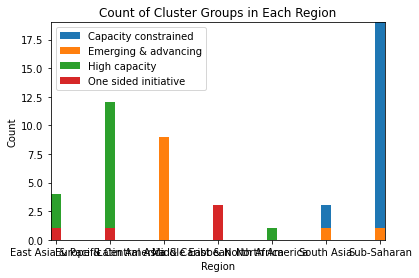

In [26]:
regions = ['East Asia & Pacific', 'Europe & Central Asia', 'Latin America & Caribbean', 'Middle East & North Africa',
           'North America', 'South Asia', 'Sub-Saharan']
width = 0.2       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(regions, capacity_constrained_region_count, width=width, label='Capacity constrained', align='center')
ax.bar(regions, emerging_and_advancing_region_count, width=width, label='Emerging & advancing', align='center')
ax.bar(regions, high_capacity_region_count, width=width, label='High capacity', align='center')
ax.bar(regions, one_sided_initiative_region_count, width=width, label='One sided initiative', align='center')

ax.set_xlabel('Region')
ax.set_ylabel('Count')
ax.set_title('Count of Cluster Groups in Each Region')
ax.legend()
ax.autoscale(tight=True)

plt.show()

ValueError: shape mismatch: objects cannot be broadcast to a single shape

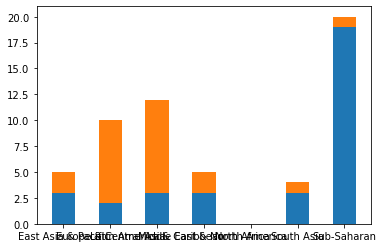

In [25]:
regions = ['East Asia & Pacific', 'Europe & Central Asia', 'Latin America & Caribbean', 'Middle East & North Africa',
           'North America', 'South Asia', 'Sub-Saharan']
width = 0.5

fig, ax = plt.subplots()

ax.bar(regions, capacity_constrained_region_count, width, label='Capacity constrained')
ax.bar(regions, emerging_and_advancing_region_count, width, bottom=capacity_constrained_region_count, label='Emerging & advancing')
ax.bar(regions, high_capacity_region_count, width, bottom=capacity_constrained_region_count+emerging_and_advancing_region_count, label='High capacity')
ax.bar(regions, one_sided_initiative_region_count, width, bottom=capacity_constrained_region_count+emerging_and_advancing_region_count+high_capacity_region_count, label='One sided initiative')

ax.set_xlabel('Region')
ax.set_ylabel('Count')
ax.set_title('Count of Cluster Groups in Each Region')
ax.legend()

plt.show()

# -------------------------------------------------------------

In [ ]:
regions = merged2014.groupby("Region")
regions["Cluster-Group"].count()

In [ ]:
east_asia_and_pacific_region = merged2014[merged2014["Region"] == "East Asia & Pacific"]
east_asia_and_pacific_region_cluster_group = east_asia_and_pacific_region.groupby("Cluster-Group")
east_asia_and_pacific_region_cluster_group_count = east_asia_and_pacific_region_cluster_group["Cluster-Group"].count()
east_asia_and_pacific_region_cluster_group_count = east_asia_and_pacific_region_cluster_group_count.tolist()
east_asia_and_pacific_region_cluster_group_count

In [ ]:
europe_and_central_asia_region = merged2014[merged2014["Region"] == "Europe & Central Asia"]
europe_and_central_asia_region_cluster_group = europe_and_central_asia_region.groupby("Cluster-Group")
europe_and_central_asia_region_cluster_group_count = europe_and_central_asia_region_cluster_group["Cluster-Group"].count()
europe_and_central_asia_region_cluster_group_count = europe_and_central_asia_region_cluster_group_count.tolist()
europe_and_central_asia_region_cluster_group_count

In [ ]:
latin_america_and_caribbean_region = merged2014[merged2014["Region"] == "Latin America & Caribbean"]
latin_america_and_caribbean_region_cluster_group = latin_america_and_caribbean_region.groupby("Cluster-Group")
latin_america_and_caribbean_region_cluster_group_count = latin_america_and_caribbean_region_cluster_group["Cluster-Group"].count()
latin_america_and_caribbean_region_cluster_group_count = latin_america_and_caribbean_region_cluster_group_count.tolist()
latin_america_and_caribbean_region_cluster_group_count

# Scatterplots of Unscaled vs ODB-Score (grouped by regions)

### Key Findings:

Europe & Central Asia consistently score high in for readiness, implementation, and impact.
        Region consistently is strong as world leaders in all three categories. Could be due to shared EU members sharing policy and regulation
    
Sub-Saharan Africa and Middle East & North Africa score poorly.

Latin America & Caribbean are middling for readiness and implementation, but score poorly in impact.
        Suggests policy is in place and ready but haven't had time to take effect, or the policy is poor and isn't having effect.

In [ ]:
groups = odb2014.groupby("Region")
for name, group in groups:
    plt.plot(group["Readiness"], group["ODB-Score"], marker="o", linestyle="", label=name)

plt.title('Readiness vs ODB-Score')
plt.xlabel('Readiness')
plt.ylabel('ODB-Score')
plt.legend()

In [ ]:
groups = odb2014.groupby("Region")
for name, group in groups:
    plt.plot(group["Implementation"], group["ODB-Score"], marker="o", linestyle="", label=name)

plt.title('Implementation vs ODB-Score')
plt.xlabel('Implementation')
plt.ylabel('ODB-Score')
plt.legend()

In [ ]:
groups = odb2014.groupby("Region")
for name, group in groups:
    plt.plot(group["Impact"], group["ODB-Score"], marker="o", linestyle="", label=name)

plt.title('Impact vs ODB-Score')
plt.xlabel('Impact')
plt.ylabel('ODB-Score')
plt.legend()

# Scatterplots of Scaled vs ODB-Scaled (grouped by regions)

### Key Findings:

No difference between scaled and unscaled.
If there is a difference, it's minute.

In [ ]:
groups = odb2014.groupby("Region")
for name, group in groups:
    plt.plot(group["Readiness-Scaled"], group["ODB-Scaled"], marker="o", linestyle="", label=name)

plt.title('Scaled Readiness vs Scaled ODB-Score')
plt.xlabel('Readiness-Scaled')
plt.ylabel('ODB-Scaled')
plt.legend()

In [ ]:
groups = odb2014.groupby("Region")
for name, group in groups:
    plt.plot(group["Implementation-Scaled"], group["ODB-Scaled"], marker="o", linestyle="", label=name)

plt.title('Scaled Implementation vs Scaled ODB-Score')
plt.xlabel('Implementation-Scaled')
plt.ylabel('ODB-Scaled')
plt.legend()

In [ ]:
groups = odb2014.groupby("Region")
for name, group in groups:
    plt.plot(group["Impact-Scaled"], group["ODB-Scaled"], marker="o", linestyle="", label=name)

plt.title('Scaled Impact vs Scaled ODB-Score')
plt.xlabel('Impact-Scaled')
plt.ylabel('ODB-Scaled')
plt.legend()

# Scatterplots of Scaled vs ODB-Scaled (grouped by cluster)

### Key Findings:

Same scatter plot data but this time the data is highlighted by cluster instead of region.

Thinking back to the regional highlights, the European and & Central Asian region is consistentl High capacity
Sub-Saharan Africa and Middle East & North Africa are Capacity restrained or have One sided initiatives

In [ ]:
groups = odb2014.groupby("Cluster")
for name, group in groups:
    plt.plot(group["Readiness-Scaled"], group["ODB-Scaled"], marker="o", linestyle="", label=name)

plt.title('Scaled Readiness vs Scaled ODB-Score')
plt.xlabel('Readiness-Scaled')
plt.ylabel('ODB-Scaled')
plt.legend()

In [ ]:
groups = odb2014.groupby("Cluster")
for name, group in groups:
    plt.plot(group["Implementation-Scaled"], group["ODB-Scaled"], marker="o", linestyle="", label=name)

plt.title('Scaled Implementation vs Scaled ODB-Score')
plt.xlabel('Implementation-Scaled')
plt.ylabel('ODB-Scaled')
plt.legend()

In [ ]:
groups = odb2014.groupby("Cluster")
for name, group in groups:
    plt.plot(group["Impact-Scaled"], group["ODB-Scaled"], marker="o", linestyle="", label=name)

plt.title('Scaled Impact vs Scaled ODB-Score')
plt.xlabel('Impact-Scaled')
plt.ylabel('ODB-Scaled')
plt.legend()

# Scatterplots of scaled ODB-Score to various indices used to calculate the E-Government Index

Key Findings:

ODB-Score and the E-Government Index are positively correlated, a good score or high index means a country is likely to do well in the other category as well.

Scatterplots of ODB-Score and the various indices used to calculate the E-Government Index support this argument as well and are generally positively correlated.

In [ ]:
plt.plot(merged2014["ODB-Score-Scaled"], merged2014["E-Government Index"], marker="o", linestyle="", label=name)

plt.title('ODB-Score-Scaled vs E-Government Index')
plt.xlabel('ODB-Score-Scaled')
plt.ylabel('E-Government Index')

In [ ]:
plt.plot(merged2014["ODB-Score-Scaled"], merged2014["E-Participation Index"], marker="o", linestyle="", label=name)

plt.title('ODB-Score-Scaled vs E-Participation Index')
plt.xlabel('ODB-Score-Scaled')
plt.ylabel('E-Participation Index')

In [ ]:
plt.plot(merged2014["ODB-Score-Scaled"], merged2014["Online Service Index"], marker="o", linestyle="", label=name)

plt.title('ODB-Score-Scaled vs Online Service Index')
plt.xlabel('ODB-Score-Scaled')
plt.ylabel('Online Service Index')

In [ ]:
plt.plot(merged2014["ODB-Score-Scaled"], merged2014["Human Capital Index"], marker="o", linestyle="", label=name)

plt.title('ODB-Score-Scaled vs Human Capital Index')
plt.xlabel('ODB-Score-Scaled')
plt.ylabel('Human Capital Index')

In [ ]:
plt.plot(merged2014["ODB-Score-Scaled"], merged2014["Telecommunication Infrastructure Index"], marker="o", linestyle="", label=name)

plt.title('ODB-Score-Scaled vs Telecommunication Infrastructure Index')
plt.xlabel('ODB-Score-Scaled')
plt.ylabel('Telecommunication Infrastructure Index')

# Scatterplots of scaled ODB-Score to various indices used to calculate the E-Government Index (grouped by region)

In [ ]:
groups = merged2014.groupby("Region")
for name, group in groups:
    plt.plot(group["ODB-Score-Scaled"], group["E-Government Index"], marker="o", linestyle="", label=name)

plt.title('ODB-Score-Scaled vs E-Government Index')
plt.xlabel('ODB-Score-Scaled')
plt.ylabel('E-Government Index')
plt.legend()

In [ ]:
groups = merged2014.groupby("Region")
for name, group in groups:
    plt.plot(group["ODB-Score-Scaled"], group["E-Participation Index"], marker="o", linestyle="", label=name)

plt.title('ODB-Score-Scaled vs E-Participation Index')
plt.xlabel('ODB-Score-Scaled')
plt.ylabel('E-Participation Index')
plt.legend()

In [ ]:
groups = merged2014.groupby("Region")
for name, group in groups:
    plt.plot(group["ODB-Score-Scaled"], group["Online Service Index"], marker="o", linestyle="", label=name)

plt.title('ODB-Score-Scaled vs Online Service Index')
plt.xlabel('ODB-Score-Scaled')
plt.ylabel('Online Service Index')
plt.legend()

In [ ]:
groups = merged2014.groupby("Region")
for name, group in groups:
    plt.plot(group["ODB-Score-Scaled"], group["Human Capital Index"], marker="o", linestyle="", label=name)

plt.title('ODB-Score-Scaled vs Human Capital Index')
plt.xlabel('ODB-Score-Scaled')
plt.ylabel('Human Capital Index')
plt.legend()

In [ ]:
groups = merged2014.groupby("Region")
for name, group in groups:
    plt.plot(group["ODB-Score-Scaled"], group["Telecommunication Infrastructure Index"], marker="o", linestyle="", label=name)

plt.title('ODB-Score-Scaled vs Telecommunication Infrastructure Index')
plt.xlabel('ODB-Score-Scaled')
plt.ylabel('Telecommunication Infrastructure Index')
plt.legend()

# Scatterplot of ODB-Rank vs E-Government Rank

Key Finding:

Outcome is as expected, a poor ranking by either data set in general means a poor ranking by the other dataset (high rank is bad).

In [ ]:
plt.plot(merged2014["ODB-Rank"], merged2014["E-Government Rank"], marker="o", linestyle="", label=name)

plt.title('ODB-Rank vs E-Government Rank')
plt.xlabel('ODB-Rank')
plt.ylabel('E-Government Rank')

# Scatterplot of ODB-Rank vs E-Government Rank (grouped by region)

In [ ]:
groups = merged2014.groupby("Region")
for name, group in groups:
    plt.plot(group["ODB-Rank"], group["E-Government Rank"], marker="o", linestyle="", label=name)

plt.title('ODB-Rank vs E-Government Rank')
plt.xlabel('ODB-Rank')
plt.ylabel('E-Government Rank')
plt.legend()

Test Code (Please ignore)

In [ ]:
region_groups = merged2014.groupby("Region")
for name, group in region_groups:
    plt.plot(group["Readiness-Scaled"], group["ODB-Score-Scaled"], marker="o", linestyle="", label=name)

plt.title('Readiness-Scaled vs ODB-Score-Scaled')
plt.xlabel('Readiness-Scaled')
plt.ylabel('ODB-Score-Scaled')
plt.legend()